In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train_data=pd.read_csv('titanic/train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data=pd.read_csv('titanic/test.csv')

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Initial Observation

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
columns_to_keep = ['PassengerId', 'Survived', 'Sex', 'Age']

for col in train_data.columns:
    if col not in columns_to_keep:
        train_data.drop(columns=col, inplace=True)


In [11]:
train_data.head()

,PassengerId,Survived,Sex,Age
0,1,0,male,22.0
1,2,1,female,38.0
2,3,1,female,26.0
3,4,1,female,35.0
4,5,0,male,35.0


In [12]:
train_data.isna().sum()

PassengerId      0
Survived         0
Sex              0
Age            177
dtype: int64

# Handling Null Value

In [13]:
for col in train_data.columns:
    if train_data[col].isna().sum()>0:
        train_data[col].fillna(value=train_data[col].mean(),inplace=True)

In [14]:
train_data.isna().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
dtype: int64

In [15]:
columns_to_keep = ['PassengerId', 'Sex', 'Age']
for col in test_data.columns:
    if col not in columns_to_keep:
        test_data.drop(columns=col, inplace=True)

In [16]:
test_data.head()

,PassengerId,Sex,Age
0,892,male,34.5
1,893,female,47.0
2,894,male,62.0
3,895,male,27.0
4,896,female,22.0


In [17]:
test_data.isna().sum()
for col in test_data.columns:
    if test_data[col].isna().sum()>0:
        test_data[col].fillna(value=test_data[col].mean(),inplace=True)

In [18]:
test_data.isna().sum()

PassengerId    0
Sex            0
Age            0
dtype: int64

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

In [21]:
label_encoder

LabelEncoder()

In [22]:
train_data.dtypes

PassengerId      int64
Survived         int64
Sex             object
Age            float64
dtype: object

In [23]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])


In [24]:
train_data.head()

,PassengerId,Survived,Sex,Age
0,1,0,1,22.0
1,2,1,0,38.0
2,3,1,0,26.0
3,4,1,0,35.0
4,5,0,1,35.0


In [25]:
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = label_encoder.fit_transform(test_data[col])

In [26]:
test_data.head()

,PassengerId,Sex,Age
0,892,1,34.5
1,893,0,47.0
2,894,1,62.0
3,895,1,27.0
4,896,0,22.0


In [27]:
x=train_data.drop('Survived',axis=1)

In [28]:
y=train_data[['Survived']]

In [29]:
x.head()

,PassengerId,Sex,Age
0,1,1,22.0
1,2,0,38.0
2,3,0,26.0
3,4,0,35.0
4,5,1,35.0


In [30]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()

In [34]:
lr

LogisticRegression()

In [35]:
lr.fit(xtrain,ytrain)
ypredict= lr.predict(xtest)

In [36]:
ypredict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

Calculating Accuracy

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_val = accuracy_score(ytest, ypredict)
print(f'Validation Accuracy: {accuracy_val:.2%}')

Validation Accuracy: 78.21%


# Vizualization

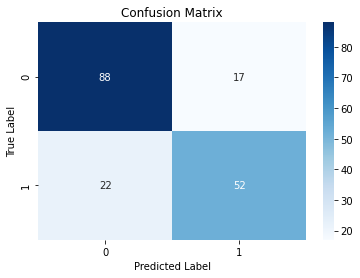

In [38]:
sns.heatmap(confusion_matrix(ytest, ypredict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [39]:
print('Classification Report:\n', classification_report(ytest, ypredict))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [40]:
test_predictions = lr.predict(test_data)
result_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
print(result_df)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


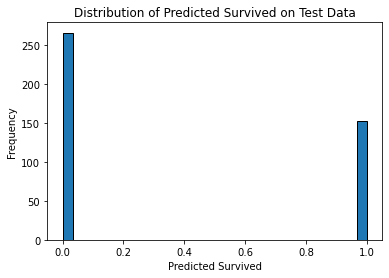

In [41]:
plt.hist(test_predictions, bins=30, edgecolor='black')
plt.xlabel('Predicted Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Survived on Test Data')
plt.show()


In [42]:
final=pd.concat([result_df],axis=1)
final.rename(columns={0:'survived'},inplace=True)
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
final.to_csv("titanic_predicted.csv")

# Conclusion:
In this project, we used logistic regression to predict Titanic passenger survival, achieving an accuracy of 78.21% on the validation set. Key steps included data preprocessing, model training, and evaluation. While logistic regression provided a solid baseline, future work may involve exploring more advanced algorithms, feature engineering, and refining the model for improved accuracy. This project serves as a foundation for deeper investigations into passenger survival patterns and advanced machine learning techniques.